In [15]:
# Importing libraries and packages
!pip install git+https://github.com/tweepy/tweepy.git
!pip install emoji
import tweepy  
import json
import nltk
import string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import pandas as pd
import string
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

# Twitter API keys and secrets
access_key = '1476766464-pvOShQraMPGHUFCAseczNk2gRYM5bVPnLiKEgUt'
access_secret = 'bAWxxtO3U9bvS3PnYhXjK89fh8b5sfTY62ZavHpUZRrBP'
api_key = 'vx5eNcgcz64SrwmS31YkfkvJE'
api_secret = 'BptsT0NdCrEjpRrtHPQ8SMDXYhOv1f3jP1KqrEfXa9KJ48Oknt'

# Connecting to the API
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

  Cloning https://github.com/tweepy/tweepy.git to /tmp/pip-req-build-93b6uh8d
  Running command git clone -q https://github.com/tweepy/tweepy.git /tmp/pip-req-build-93b6uh8d
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Created wheel for tweepy: filename=tweepy-4.2.0-py2.py3-none-any.whl size=63145 sha256=6c38fba74d91b98415a1f4831ab90a63e53dc01f4256d7bd1fc8f03fc58d99ca
  Stored in directory: /tmp/pip-ephem-wheel-cache-87pvrtew/wheels/37/db/50/af7b44cc37a83332e50fbebe7290974b5f463e294dbc4eeaf8
Successfully built tweepy
  Using cached emoji-1.6.1-py3-none-any.whl


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Getting 30 english tweets about Edinburgh
edin_tweets = api.search_tweets(q='edinburgh', lang='en', count='30')

# Getting 30 english tweets about Glasgow
glas_tweets = api.search_tweets(q='glasgow', lang='en', count='30')

In [17]:
# Creating a function to get the text from the tweets and tokenise them

def text_and_tokenise(my_tweets):
    tweets_text = []
    for each in my_tweets:
        tweets_text.append(each._json['text'])
    my_tweets = tweets_text
    
    tweets_string = " ".join(my_tweets)
    from nltk.tokenize import word_tokenize
    tokens = word_tokenize(tweets_string)
    lowercase_tokens = [token.lower() for token in tokens]
    return lowercase_tokens

In [18]:
# Using the text and tokenise function for imported tweets 'edin_tweets' and 'glas_tweets'

edin_tweets = text_and_tokenise(edin_tweets)
glas_tweets = text_and_tokenise(glas_tweets)

In [26]:
# Creating a function to clean the data for imported tweets

# On top of stopwords, puntuations and digits, we want to remove numbers, meaningless words, additional punctuations,
# links occuring due to retweets, and emojis

def clean_tweets(my_tweets):

    # We want to remove numbers between 1 and 100 to focus on words
    numbers_1_to_100 = [str(integer) for integer in range(101)]

    # We observe additional punctuations and meaningless words as we update wordclouds, 
    # and adjust this list for a clearer view
    others_to_remove = ["...", "n't", "rt", "https", "''", '``', "'s", "..", ".", "O...", "'", "jrt", "we've", "_dmcrcy", "lhr-gla", "yo...", "x2", """, """, "d.j", ",", "p...", "a...", "un", "-", "_", "'re", "st", "i...", "th...", "....", "’", "p...", "s...", "the...", "x", "‘","st...", "in…", "e", "b", "ea", "ea..."]

    # To remove links, we use RegEx to list all tokens starting with "//", 
    # we also add another RegEx condition to clean Earth emojis in between other characters
    remove_links = [word for word in my_tweets if re.search('^//.*', word) or re.search('^🌍.*', word)]

    # We create a function to extract the emoji list to also remove them as we want to focus on most used words
    import emoji
    def extract_emojis(my_tweets):
        emoji_list = [] 
        emoji_list.extend(''.join(e for e in my_tweets if e in emoji.UNICODE_EMOJI['en']))
        return emoji_list

    remove_emojis = extract_emojis(my_tweets)

    # Now we combine everything we want to remove 
    remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) + numbers_1_to_100 + others_to_remove + remove_links + remove_emojis)
    cleaned_text = [token 
                 for token in my_tweets
                 if not token in remove_these]
    return cleaned_text

In [29]:
# Using the cleansing function for imported tweets 'edin_tweets' and 'glas_tweets'

edin_tweets = clean_tweets(edin_tweets)
glas_tweets = clean_tweets(glas_tweets)

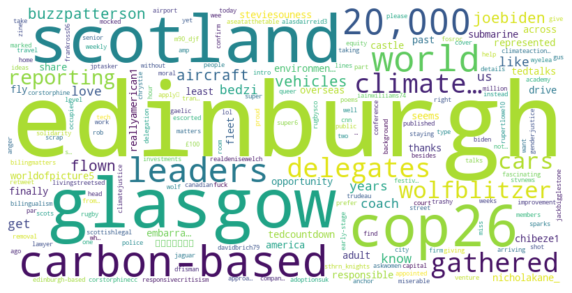

None




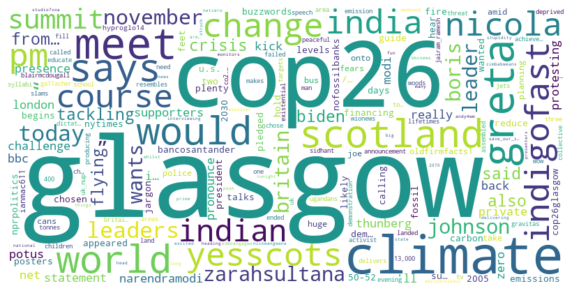

None


In [28]:
# Creating wordclouds for most common words in tweets about each city

!pip install wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

def plot_wordcloud(my_tweets):
    simple_frequencies_dict = Counter(my_tweets)

    cloud = WordCloud(width=800, height=400, max_font_size=160,colormap="viridis", background_color='white').generate_from_frequencies(simple_frequencies_dict)
    plt.figure(figsize=(10,6))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    return plt.show()

print(plot_wordcloud(edin_tweets))
print("\n")
print(plot_wordcloud(glas_tweets))

# Mini-report
We work with Twitter API and we aim to make a simulation for defining trend topics about a location. In order to achieve this purpose we import 30 tweets each about Edinburgh and Glasgow as our samples to work on. First we import required libraries and packages and then we set up Twitter API to extract the tweets indicating Edinburgh and Glasgow. Next we seperate the texts of the tweets and tokenise them to make word-based analysis later. Then we define the token groups we need to remove. On top of stopwords, puntuations and digits, we want to remove numbers, meaningless words, additional punctuations, links occuring due to retweets, and also emojis. Finally, we use Counter and Wordcloud to visualise what are the top words in relation to the two cities. Here it is important to note that each time we run the code from the beginning, the wordclouds change because of the new tweets imported from API. In our version on 1st Nov, we see that words such as 'cop26', 'climate', 'greta' and 'world' are most popular in both cities. In the effect of COP26 events, we would not expect drastic changes in trending words within the week.